In [8]:
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import ImageFolder
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch
import numpy as np
import matplotlib.pyplot as plt

def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

transform = transforms.Compose(
    [transforms.Resize(64),  # Изменяем размер изображений до 64x64
     transforms.CenterCrop(64),  # Обрезаем изображение до 64x64
     transforms.RandomHorizontalFlip(),  # Случайное горизонтальное переворачивание
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# dataset = ImageFolder(root='open_images_classification', transform=transform)
dataset = ImageFolder(root='open_images_house', transform=transform)

train_size = int(0.9 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

trainloader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=2)
testloader = DataLoader(test_dataset, batch_size=4, shuffle=False, num_workers=2)

classes = dataset.classes

# Определение нейронной сети
class ConvNeuralNet(nn.Module):
    def __init__(self, num_classes):
        super(ConvNeuralNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(64, 128, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        self.conv3 = nn.Conv2d(128, 256, 3, padding=1)
        self.bn3 = nn.BatchNorm2d(256)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.5)
        self.fc1 = nn.Linear(256 * 8 * 8, 512)  # Размер входа зависит от размера после conv/pool слоев
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, num_classes)  # 10 выходных нейронов для многоклассовой классификации

    def forward(self, x):
        # print(f'Input: {x.shape}')
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        # print(f'After conv1: {x.shape}')
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        # print(f'After conv2: {x.shape}')
        x = self.pool(F.relu(self.bn3(self.conv3(x))))
        # print(f'After conv3: {x.shape}')
        x = x.view(-1, 256 * 8 * 8)
        # print(f'After view: {x.shape}')
        x = F.relu(self.fc1(x))
        # print(f'After fc1: {x.shape}')
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        # print(f'After fc2: {x.shape}')
        x = self.dropout(x)
        x = self.fc3(x)  # Используем линейный слой для многоклассовой классификации
        # print(f'Output: {x.shape}')
        return x

device = "cuda" if torch.cuda.is_available() else "cpu"

# set the model to device
model = ConvNeuralNet(len(classes)).to(device)

# set loss function
loss_func = nn.CrossEntropyLoss()

# set learning rate 
lerning_rate = 0.010

# set optimizer as SGD
optimizer = torch.optim.SGD(
    model.parameters(), lr=lerning_rate
) 


Эпоха:  0
Обучение завершен  ======   
Epoch [1/10], Loss: 4.7547
Эпоха:  1
Обучение завершен  ======   
Epoch [2/10], Loss: 0.4684
Эпоха:  2
Обучение завершен  ======   
Epoch [3/10], Loss: 2.4084
Эпоха:  3
Обучение завершен  ======   
Epoch [4/10], Loss: 0.0185
Эпоха:  4
Обучение завершен  ======   
Epoch [5/10], Loss: 0.8096
Эпоха:  5
Обучение завершен  ======   
Epoch [6/10], Loss: 2.0827
Эпоха:  6
Обучение завершен  ======   
Epoch [7/10], Loss: 0.3258
Эпоха:  7
Обучение завершен  ======   
Epoch [8/10], Loss: 0.3907
Эпоха:  8
Обучение завершен  ======   
Epoch [9/10], Loss: 1.7200
Эпоха:  9
Обучение завершен  ======   
Epoch [10/10], Loss: 1.6204
labels ---> tensor([9, 9, 9, 0])
predicted ---> tensor([9, 9, 9, 9])
total ---> 4
correct ---> 3
Истинный класс: Other, Предсказанный класс: Other


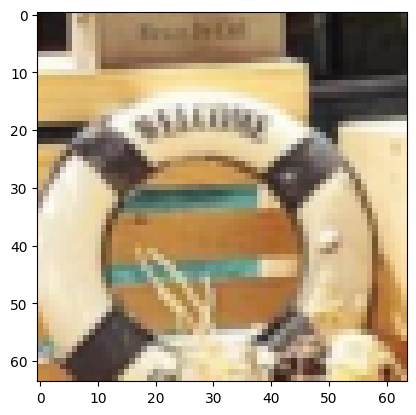

Истинный класс: Other, Предсказанный класс: Other


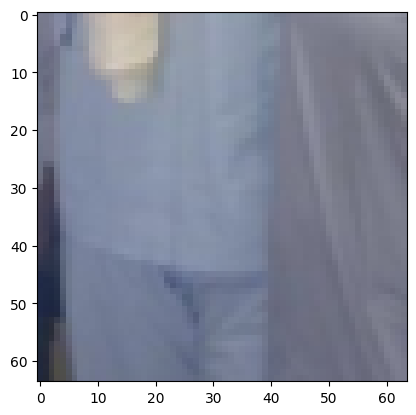

Истинный класс: Other, Предсказанный класс: Other


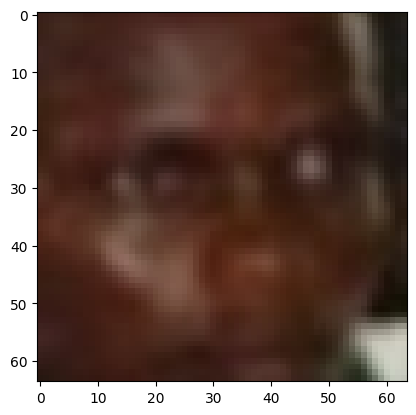

Истинный класс: Building, Предсказанный класс: Other


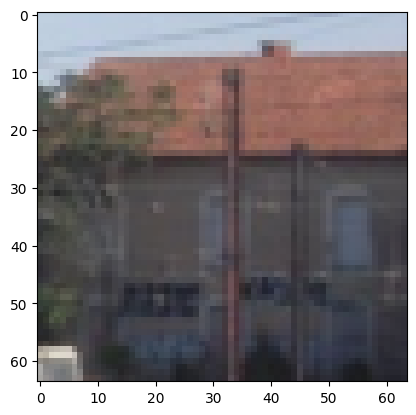

labels ---> tensor([9, 9, 9, 9])
predicted ---> tensor([9, 9, 9, 9])
total ---> 8
correct ---> 7
Истинный класс: Other, Предсказанный класс: Other


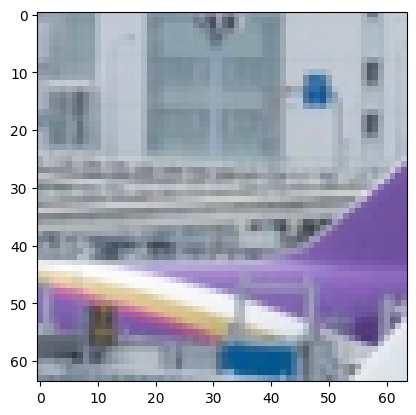

Истинный класс: Other, Предсказанный класс: Other


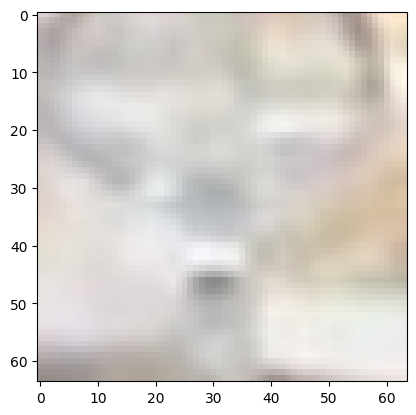

Истинный класс: Other, Предсказанный класс: Other


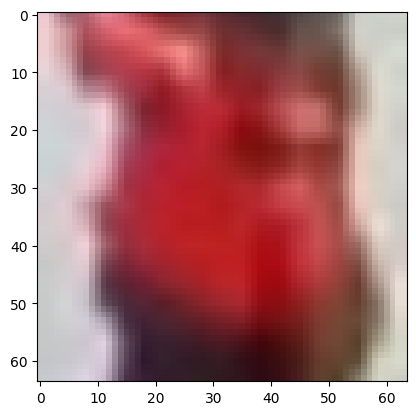

Истинный класс: Other, Предсказанный класс: Other


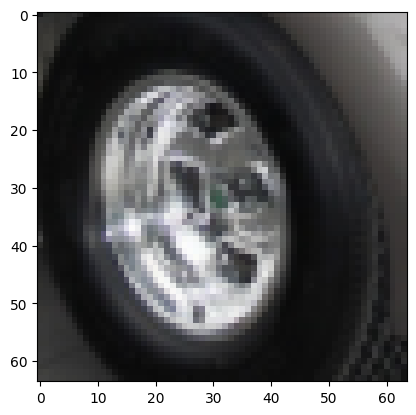

labels ---> tensor([9, 6, 9, 9])
predicted ---> tensor([9, 9, 9, 9])
total ---> 12
correct ---> 10
Истинный класс: Other, Предсказанный класс: Other


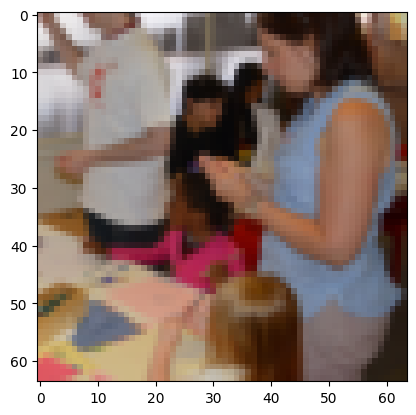

Истинный класс: House, Предсказанный класс: Other


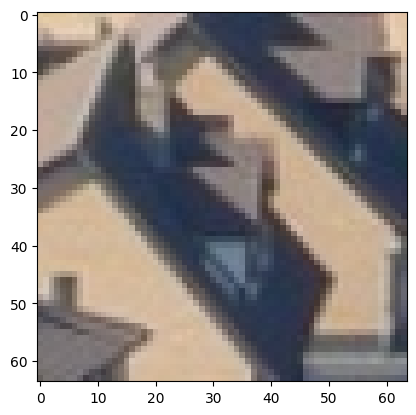

Истинный класс: Other, Предсказанный класс: Other


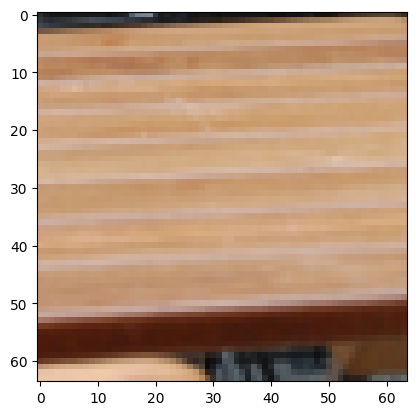

Истинный класс: Other, Предсказанный класс: Other


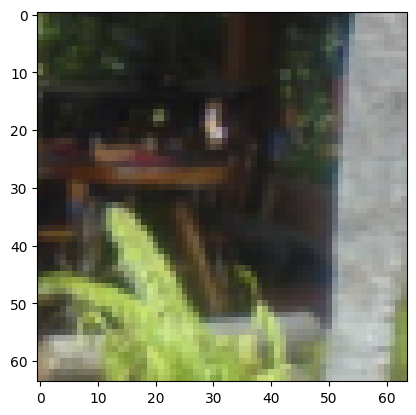

labels ---> tensor([9, 6, 0, 9])
predicted ---> tensor([9, 0, 9, 9])
total ---> 16
correct ---> 12
Истинный класс: Other, Предсказанный класс: Other


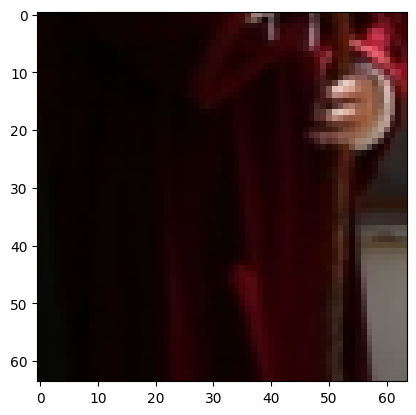

Истинный класс: House, Предсказанный класс: Building


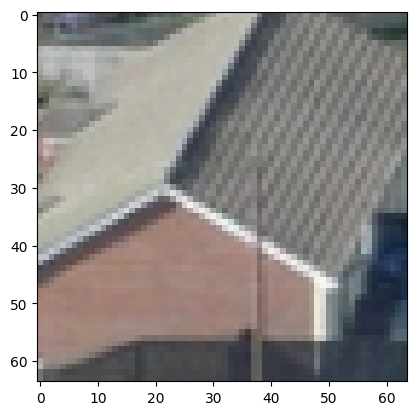

Истинный класс: Building, Предсказанный класс: Other


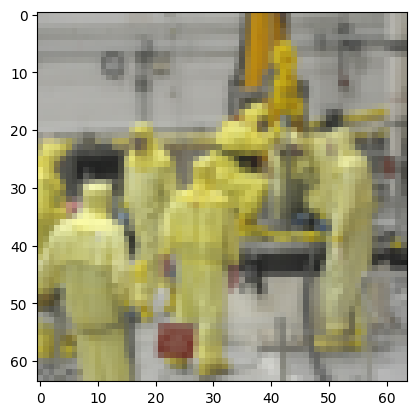

Истинный класс: Other, Предсказанный класс: Other


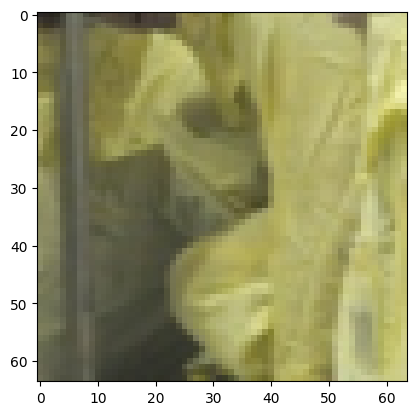

labels ---> tensor([9, 9, 9, 9])
predicted ---> tensor([9, 9, 9, 9])
total ---> 20
correct ---> 16
Истинный класс: Other, Предсказанный класс: Other


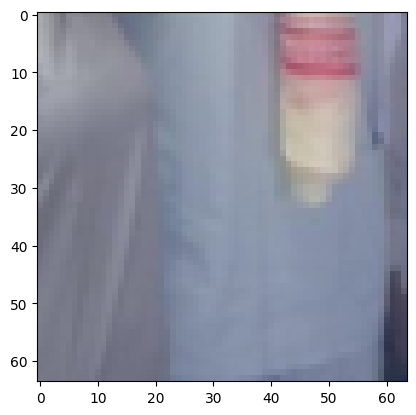

Истинный класс: Other, Предсказанный класс: Other


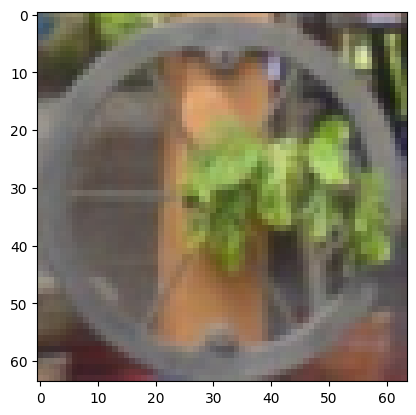

Истинный класс: Other, Предсказанный класс: Other


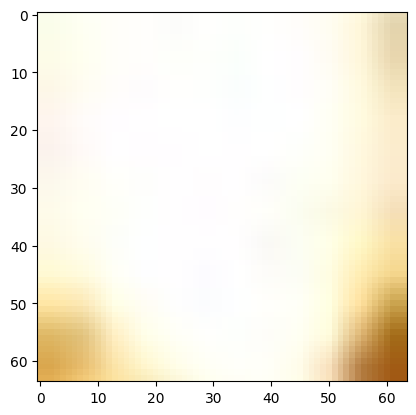

Истинный класс: Other, Предсказанный класс: Other


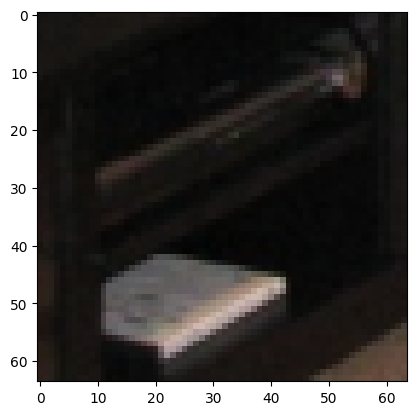

labels ---> tensor([10, 10,  5, 10])
predicted ---> tensor([9, 0, 9, 9])
total ---> 24
correct ---> 16
Истинный класс: Window, Предсказанный класс: Other


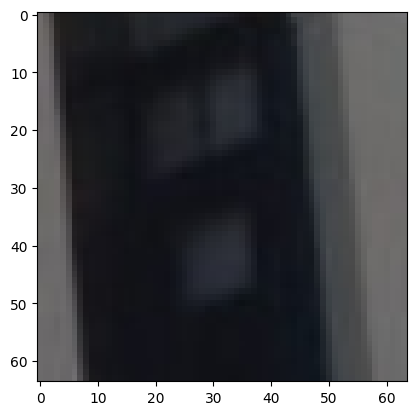

Истинный класс: Window, Предсказанный класс: Building


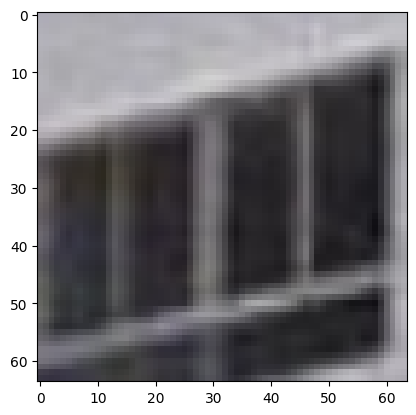

Истинный класс: Furniture, Предсказанный класс: Other


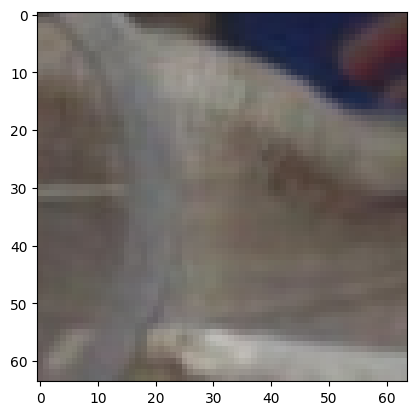

Истинный класс: Window, Предсказанный класс: Other


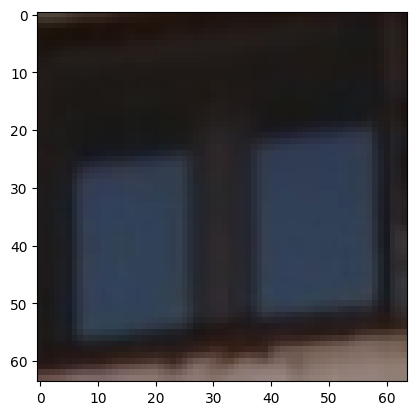

labels ---> tensor([9, 9, 9, 9])
predicted ---> tensor([9, 0, 9, 9])
total ---> 28
correct ---> 19
Истинный класс: Other, Предсказанный класс: Other


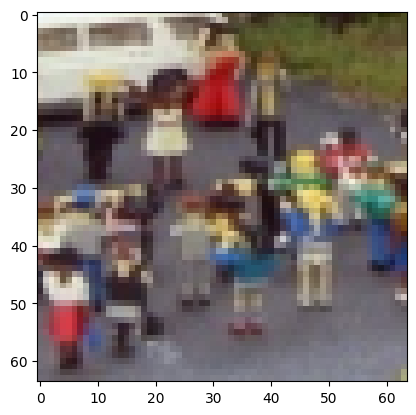

Истинный класс: Other, Предсказанный класс: Building


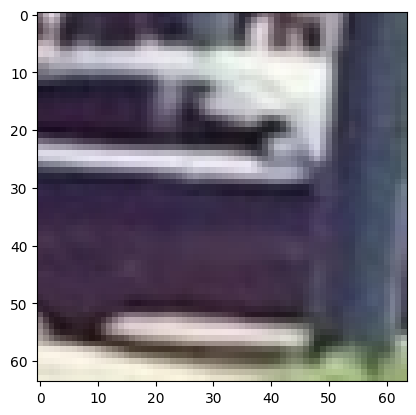

Истинный класс: Other, Предсказанный класс: Other


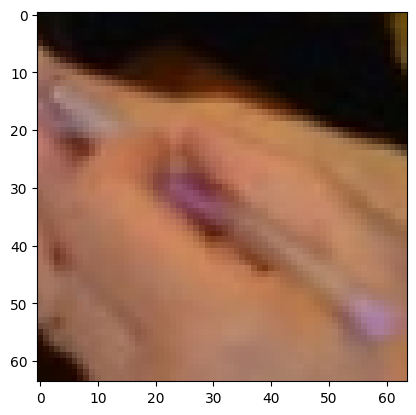

Истинный класс: Other, Предсказанный класс: Other


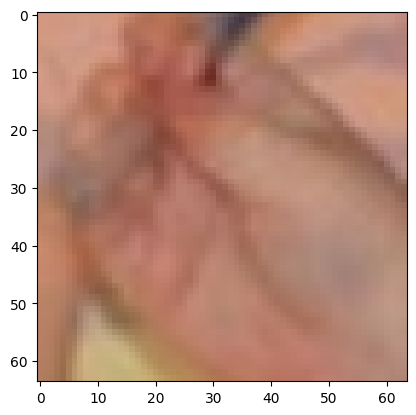

labels ---> tensor([9, 9, 9, 9])
predicted ---> tensor([9, 9, 9, 0])
total ---> 32
correct ---> 22
Истинный класс: Other, Предсказанный класс: Other


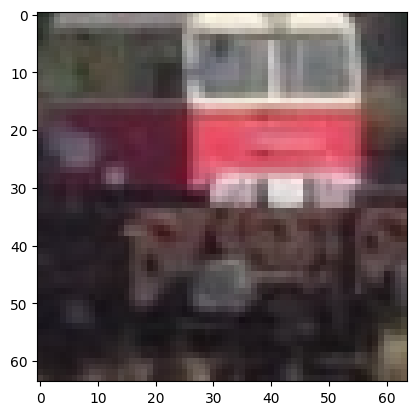

Истинный класс: Other, Предсказанный класс: Other


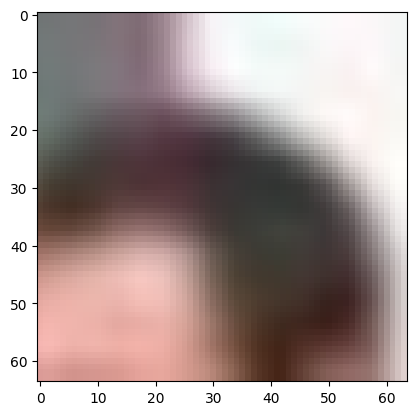

Истинный класс: Other, Предсказанный класс: Other


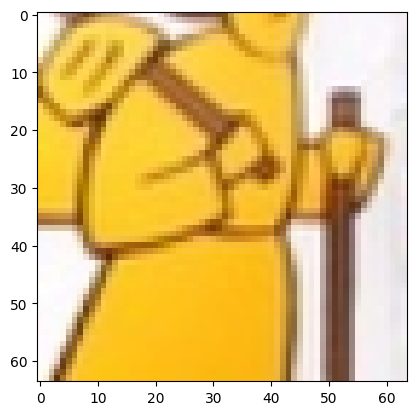

Истинный класс: Other, Предсказанный класс: Building


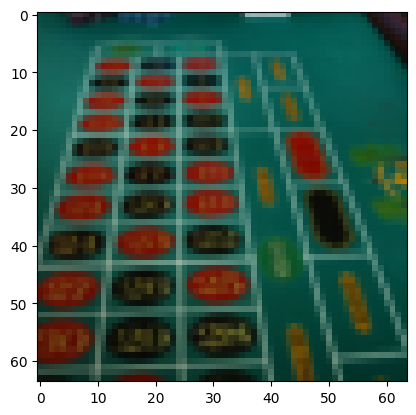

labels ---> tensor([9, 6, 9, 9])
predicted ---> tensor([9, 9, 9, 9])
total ---> 36
correct ---> 25
Истинный класс: Other, Предсказанный класс: Other


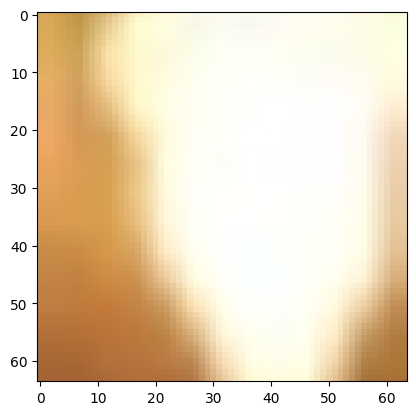

Истинный класс: House, Предсказанный класс: Other


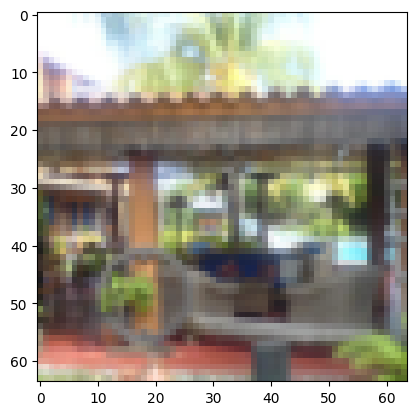

Истинный класс: Other, Предсказанный класс: Other


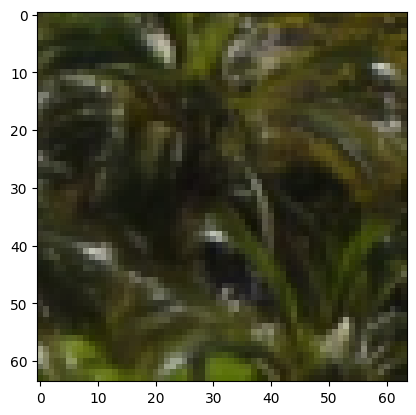

Истинный класс: Other, Предсказанный класс: Other


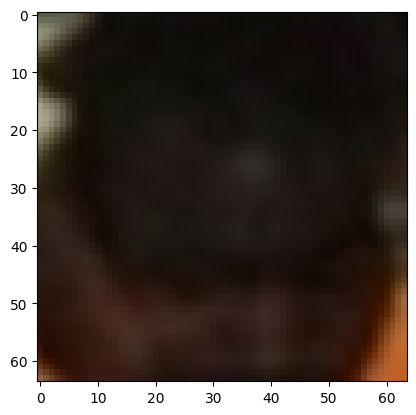

labels ---> tensor([9, 9, 9, 9])
predicted ---> tensor([9, 9, 9, 9])
total ---> 40
correct ---> 29
Истинный класс: Other, Предсказанный класс: Other


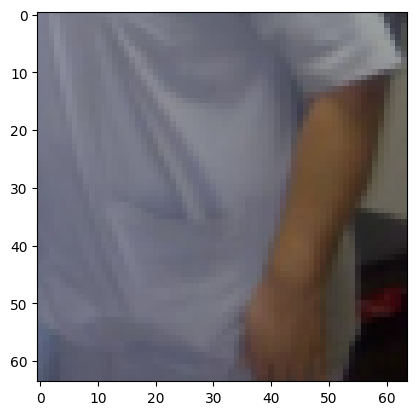

Истинный класс: Other, Предсказанный класс: Other


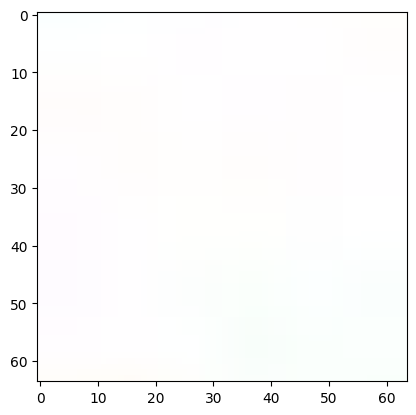

Истинный класс: Other, Предсказанный класс: Other


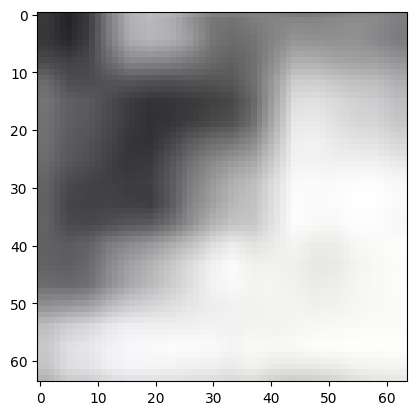

Истинный класс: Other, Предсказанный класс: Other


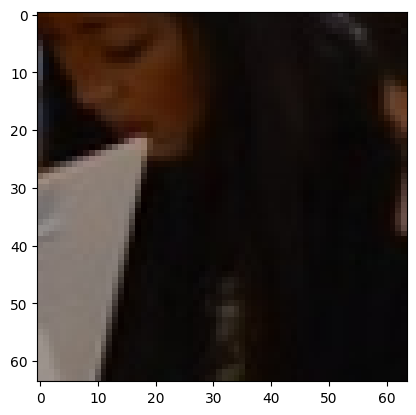

labels ---> tensor([9, 9, 9, 9])
predicted ---> tensor([9, 9, 9, 9])
total ---> 44
correct ---> 33
Истинный класс: Other, Предсказанный класс: Other


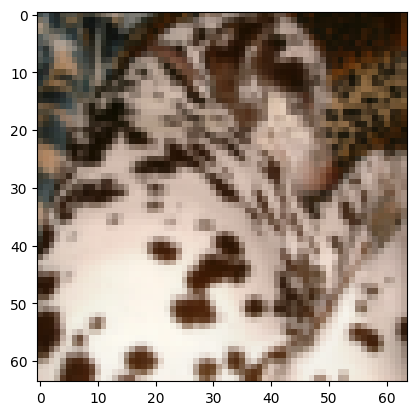

Истинный класс: Other, Предсказанный класс: Other


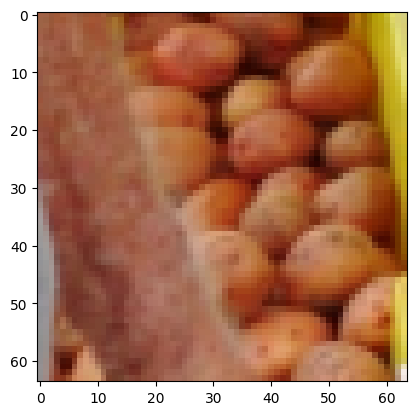

Истинный класс: Other, Предсказанный класс: Other


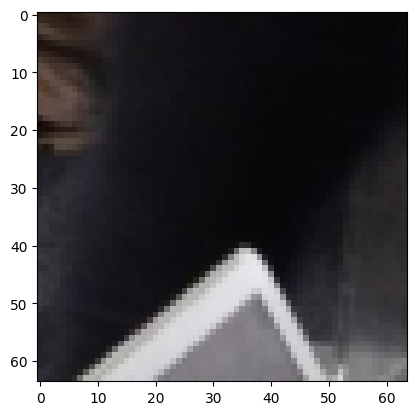

Истинный класс: Other, Предсказанный класс: Other


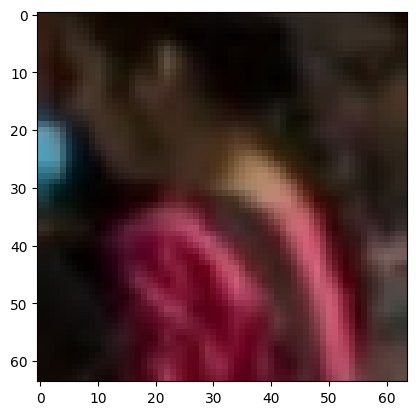

labels ---> tensor([9, 1, 9, 9])
predicted ---> tensor([9, 9, 9, 9])
total ---> 48
correct ---> 36
Истинный класс: Other, Предсказанный класс: Other


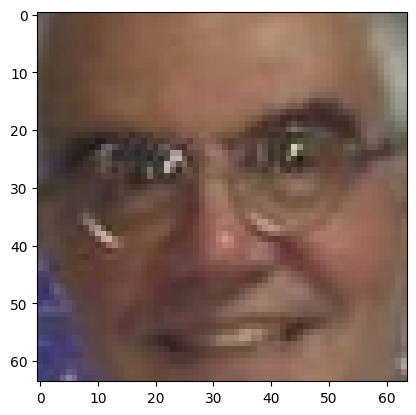

Истинный класс: Cabinetry, Предсказанный класс: Other


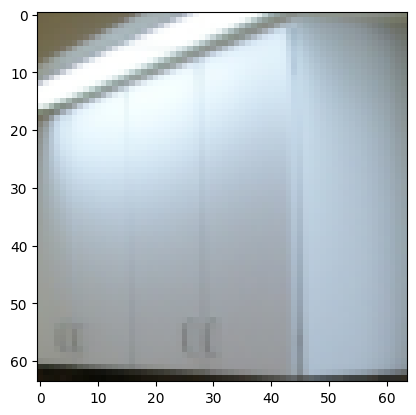

Истинный класс: Other, Предсказанный класс: Other


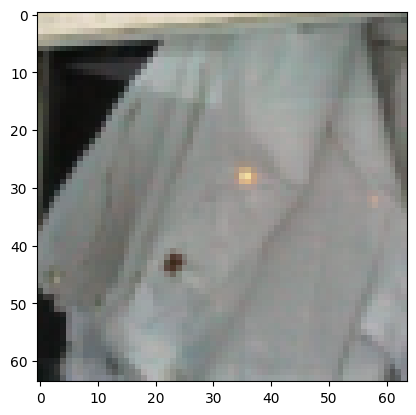

Истинный класс: Other, Предсказанный класс: Other


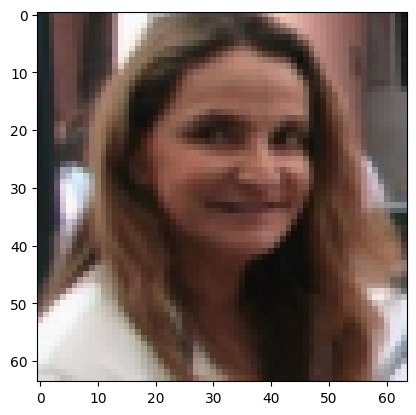

labels ---> tensor([9, 9, 9, 9])
predicted ---> tensor([9, 9, 9, 9])
total ---> 52
correct ---> 40
Истинный класс: Other, Предсказанный класс: Other


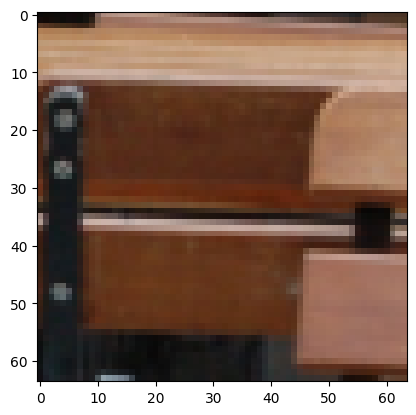

Истинный класс: Other, Предсказанный класс: Other


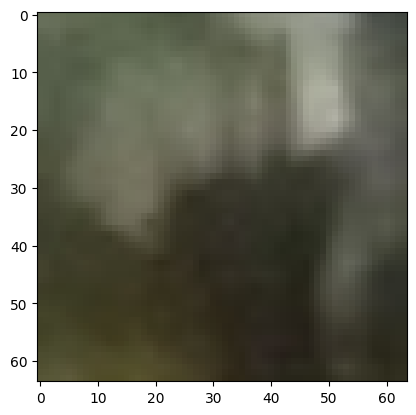

Истинный класс: Other, Предсказанный класс: Other


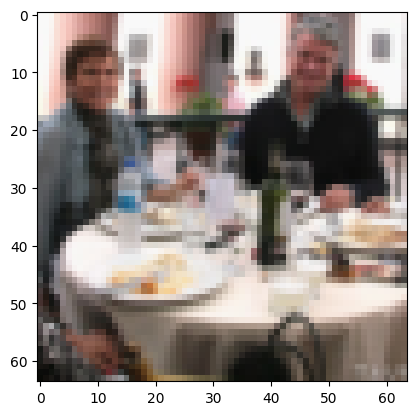

Истинный класс: Other, Предсказанный класс: Other


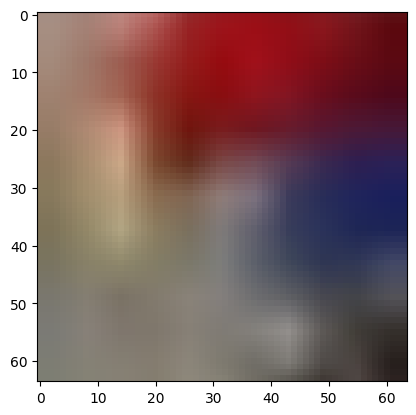

labels ---> tensor([6, 0, 9, 6])
predicted ---> tensor([9, 9, 0, 9])
total ---> 56
correct ---> 40
Истинный класс: House, Предсказанный класс: Other


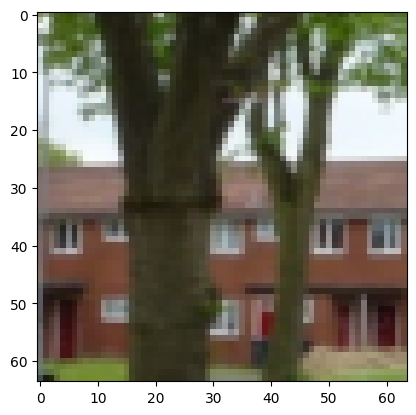

Истинный класс: Building, Предсказанный класс: Other


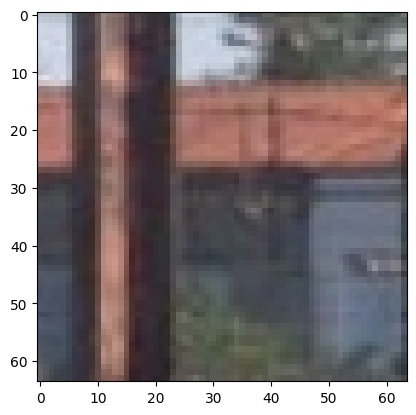

Истинный класс: Other, Предсказанный класс: Building


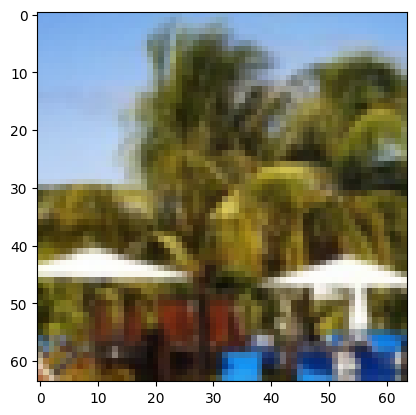

Истинный класс: House, Предсказанный класс: Other


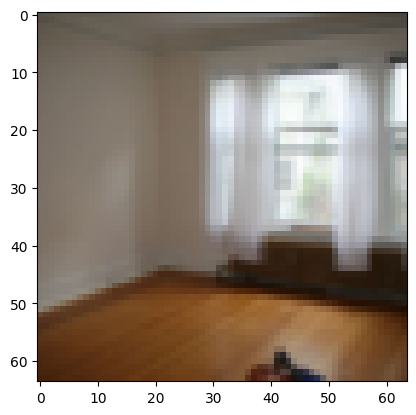

labels ---> tensor([9, 5, 9, 9])
predicted ---> tensor([0, 9, 9, 9])
total ---> 60
correct ---> 42
Истинный класс: Other, Предсказанный класс: Building


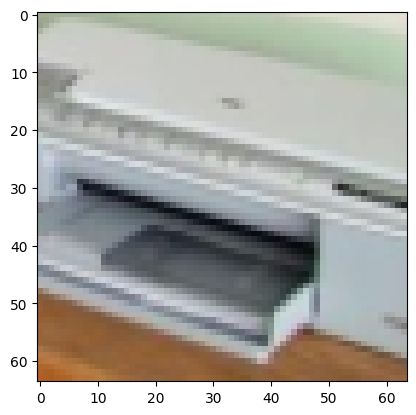

Истинный класс: Furniture, Предсказанный класс: Other


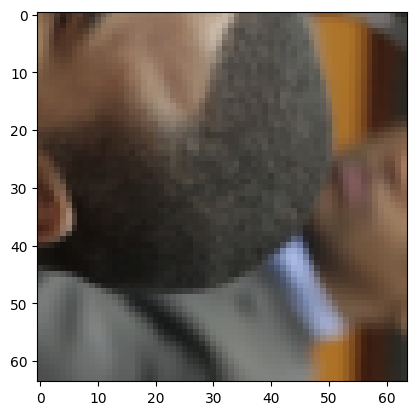

Истинный класс: Other, Предсказанный класс: Other


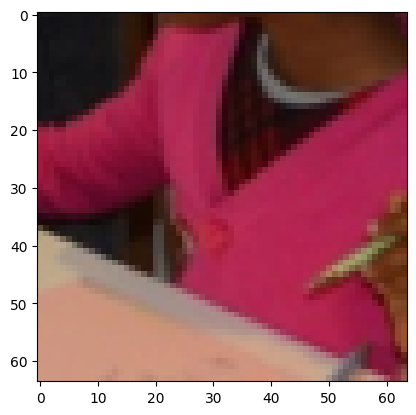

Истинный класс: Other, Предсказанный класс: Other


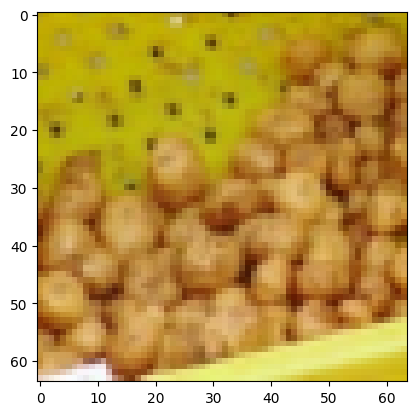

labels ---> tensor([9, 0, 9, 9])
predicted ---> tensor([9, 9, 9, 9])
total ---> 64
correct ---> 45
Истинный класс: Other, Предсказанный класс: Other


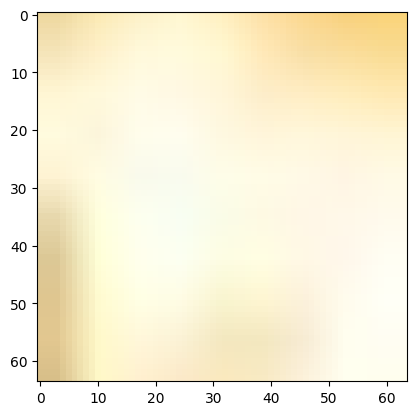

Истинный класс: Building, Предсказанный класс: Other


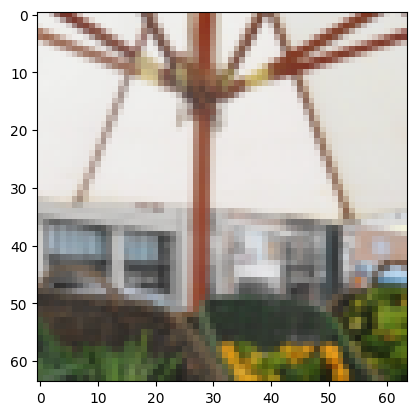

Истинный класс: Other, Предсказанный класс: Other


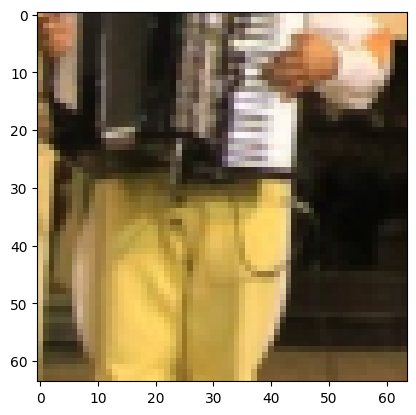

Истинный класс: Other, Предсказанный класс: Other


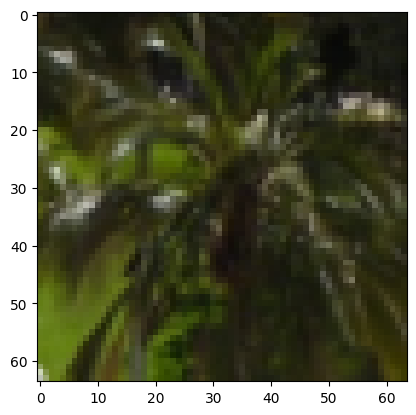

labels ---> tensor([9, 9, 9, 9])
predicted ---> tensor([9, 0, 9, 9])
total ---> 68
correct ---> 48
Истинный класс: Other, Предсказанный класс: Other


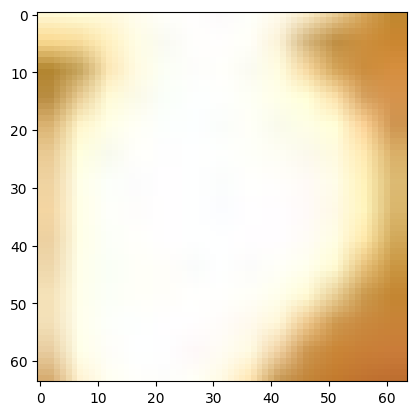

Истинный класс: Other, Предсказанный класс: Building


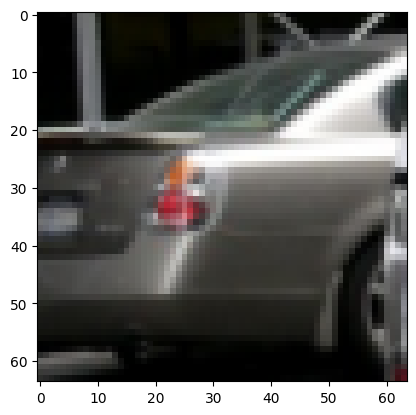

Истинный класс: Other, Предсказанный класс: Other


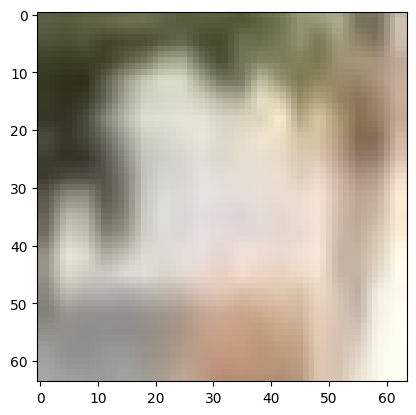

Истинный класс: Other, Предсказанный класс: Other


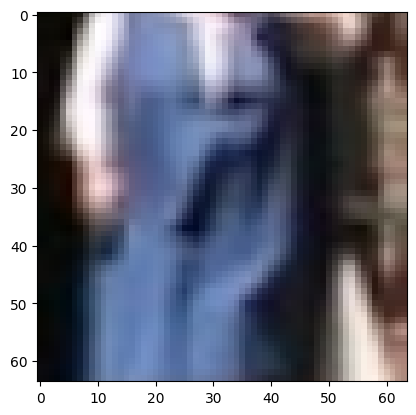

labels ---> tensor([9, 5, 8, 5])
predicted ---> tensor([9, 9, 9, 9])
total ---> 72
correct ---> 49
Истинный класс: Other, Предсказанный класс: Other


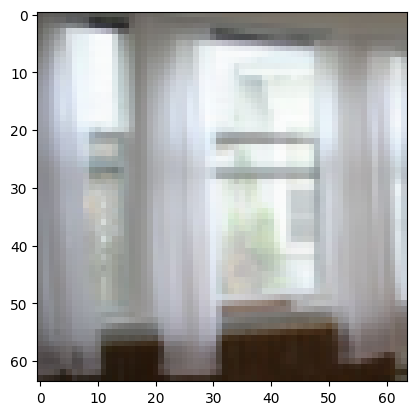

Истинный класс: Furniture, Предсказанный класс: Other


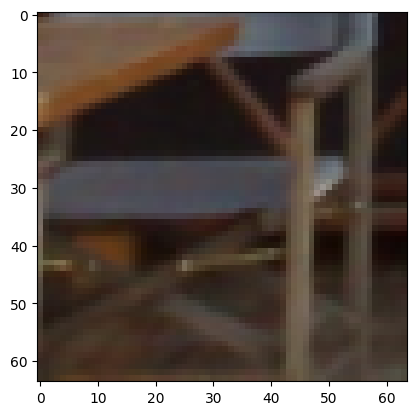

Истинный класс: Office supplies, Предсказанный класс: Other


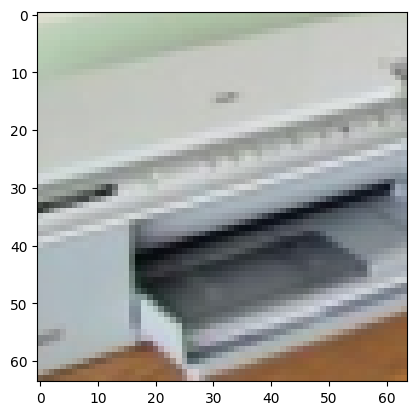

Истинный класс: Furniture, Предсказанный класс: Other


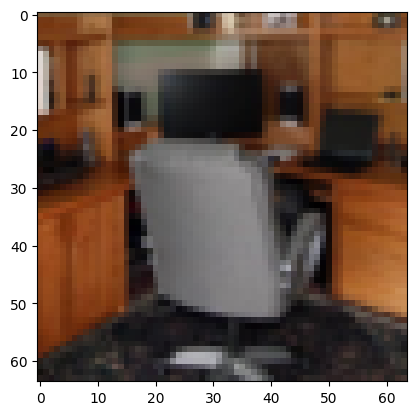

labels ---> tensor([ 9,  9, 10,  5])
predicted ---> tensor([ 9,  9, 10,  0])
total ---> 76
correct ---> 52
Истинный класс: Other, Предсказанный класс: Other


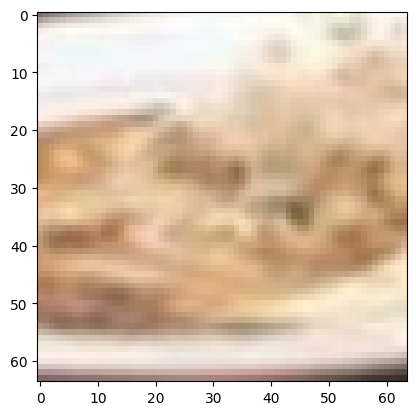

Истинный класс: Other, Предсказанный класс: Other


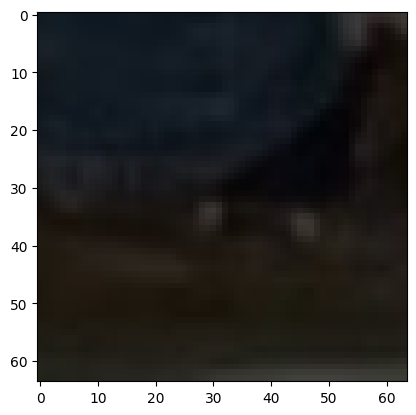

Истинный класс: Window, Предсказанный класс: Window


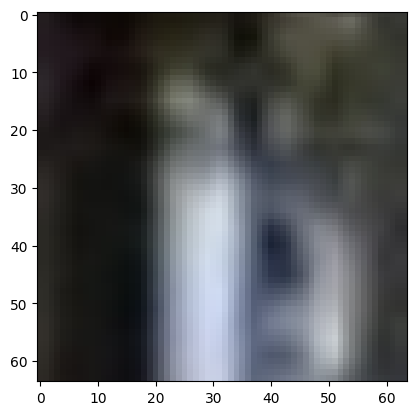

Истинный класс: Furniture, Предсказанный класс: Building


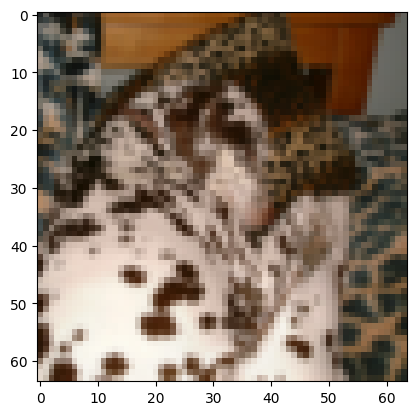

labels ---> tensor([ 9, 10,  9,  1])
predicted ---> tensor([9, 0, 9, 9])
total ---> 80
correct ---> 54
Истинный класс: Other, Предсказанный класс: Other


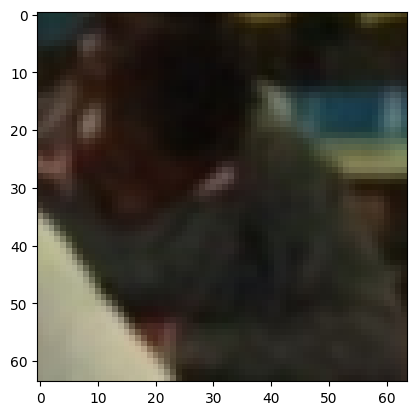

Истинный класс: Window, Предсказанный класс: Building


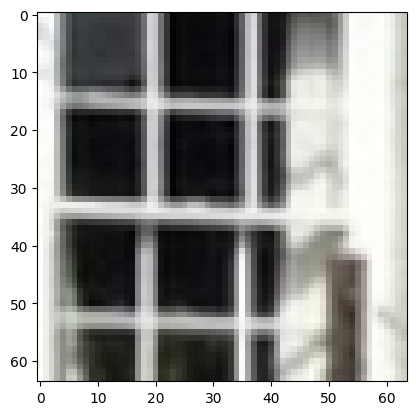

Истинный класс: Other, Предсказанный класс: Other


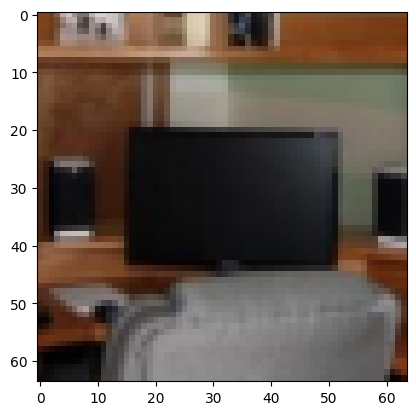

Истинный класс: Cabinetry, Предсказанный класс: Other


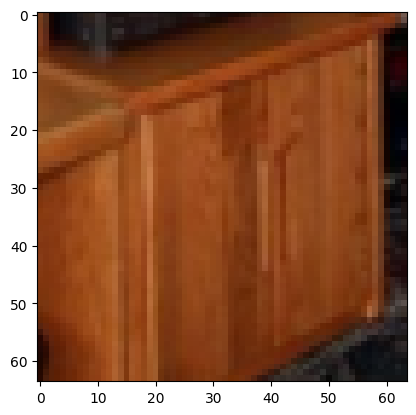

labels ---> tensor([10,  9,  9,  5])
predicted ---> tensor([10,  9,  9,  9])
total ---> 84
correct ---> 57
Истинный класс: Window, Предсказанный класс: Window


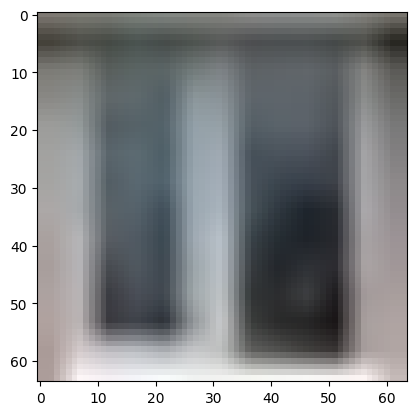

Истинный класс: Other, Предсказанный класс: Other


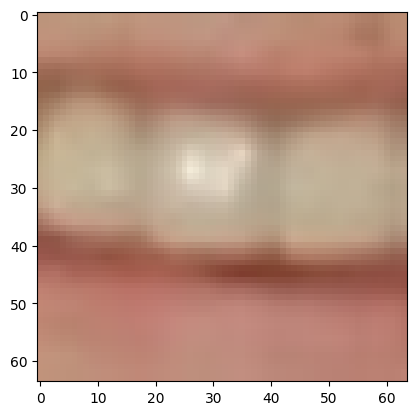

Истинный класс: Other, Предсказанный класс: Other


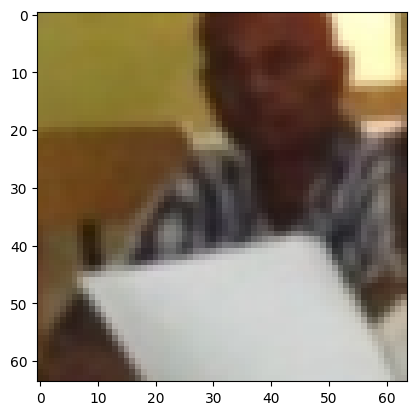

Истинный класс: Furniture, Предсказанный класс: Other


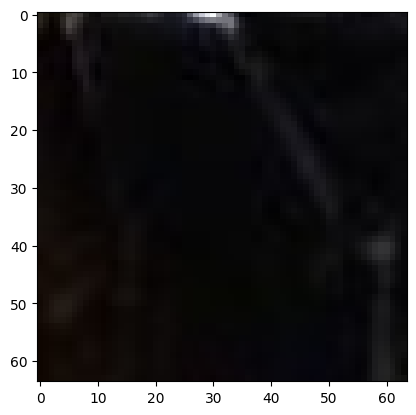

labels ---> tensor([ 9,  9, 10,  9])
predicted ---> tensor([9, 9, 9, 9])
total ---> 88
correct ---> 60
Истинный класс: Other, Предсказанный класс: Other


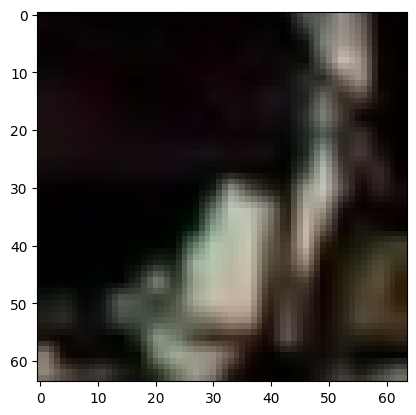

Истинный класс: Other, Предсказанный класс: Other


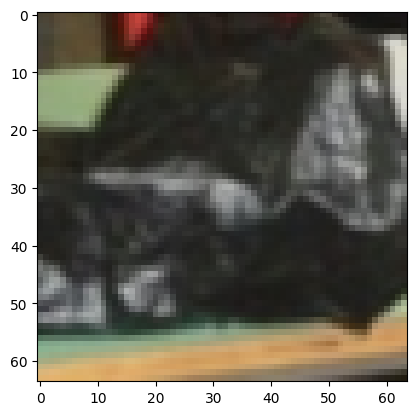

Истинный класс: Window, Предсказанный класс: Other


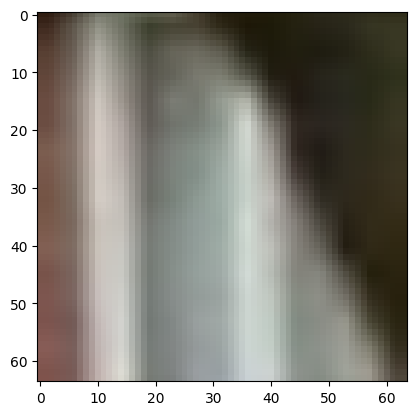

Истинный класс: Other, Предсказанный класс: Other


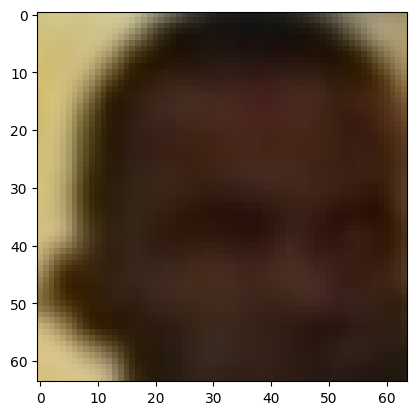

labels ---> tensor([0, 9, 9, 9])
predicted ---> tensor([9, 9, 9, 9])
total ---> 92
correct ---> 63
Истинный класс: Building, Предсказанный класс: Other


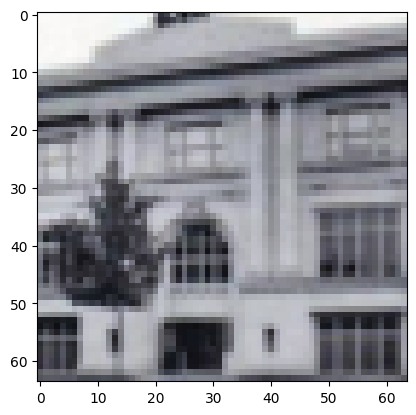

Истинный класс: Other, Предсказанный класс: Other


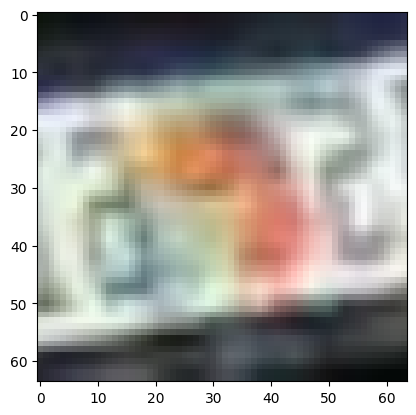

Истинный класс: Other, Предсказанный класс: Other


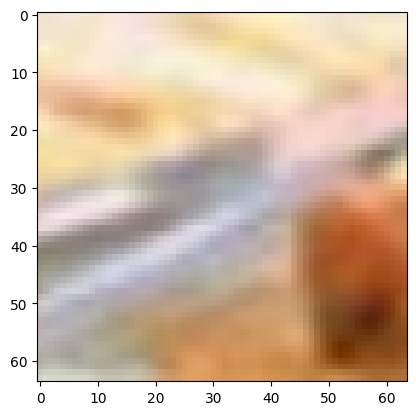

Истинный класс: Other, Предсказанный класс: Other


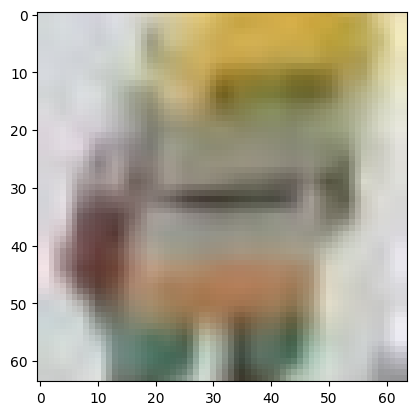

labels ---> tensor([9, 9, 9, 0])
predicted ---> tensor([9, 9, 0, 9])
total ---> 96
correct ---> 65
Истинный класс: Other, Предсказанный класс: Other


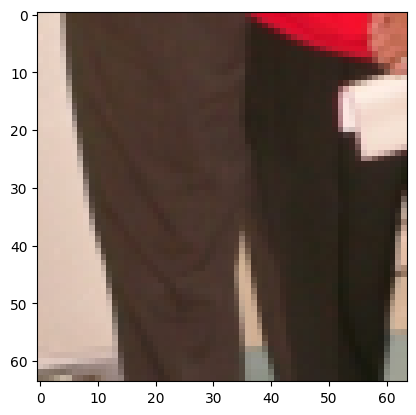

Истинный класс: Other, Предсказанный класс: Other


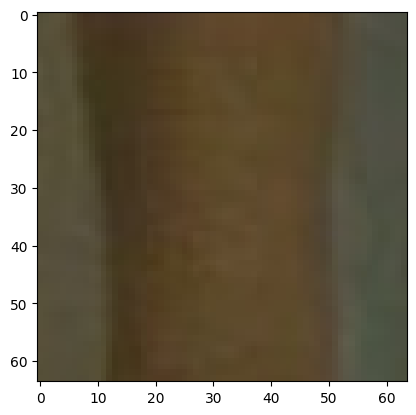

Истинный класс: Other, Предсказанный класс: Building


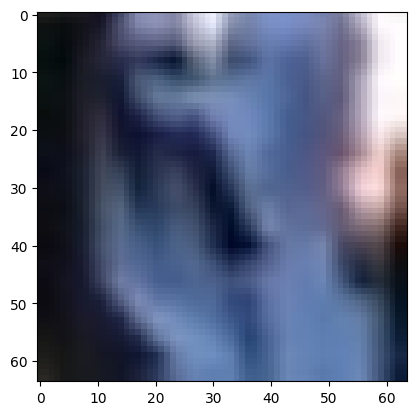

Истинный класс: Building, Предсказанный класс: Other


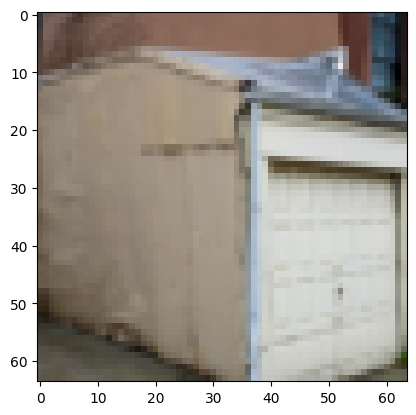

labels ---> tensor([ 0,  9, 10,  8])
predicted ---> tensor([9, 9, 9, 9])
total ---> 100
correct ---> 66
Истинный класс: Building, Предсказанный класс: Other


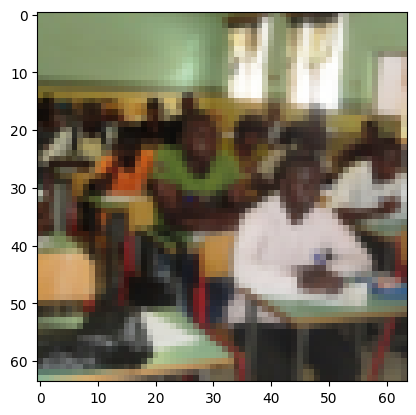

Истинный класс: Other, Предсказанный класс: Other


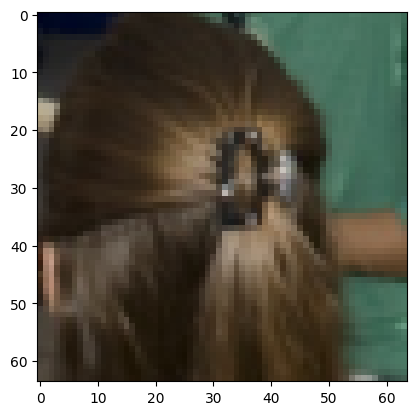

Истинный класс: Window, Предсказанный класс: Other


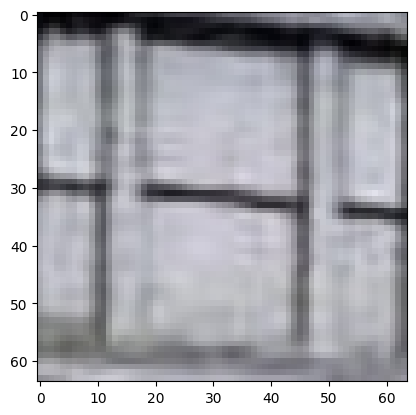

Истинный класс: Office supplies, Предсказанный класс: Other


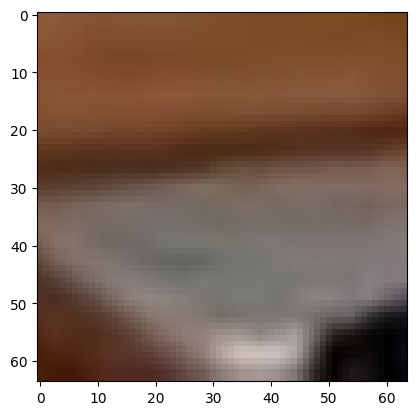

labels ---> tensor([10,  7,  6,  9])
predicted ---> tensor([0, 9, 9, 9])
total ---> 104
correct ---> 67
Истинный класс: Window, Предсказанный класс: Building


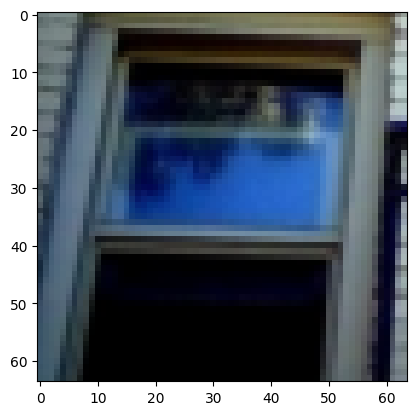

Истинный класс: Kitchen appliance, Предсказанный класс: Other


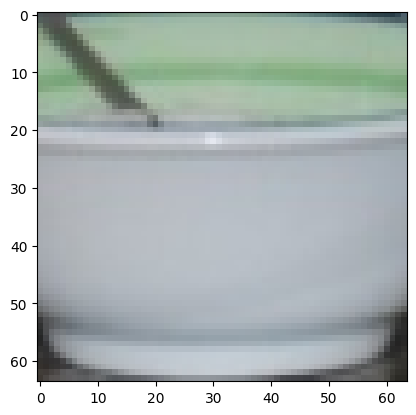

Истинный класс: House, Предсказанный класс: Other


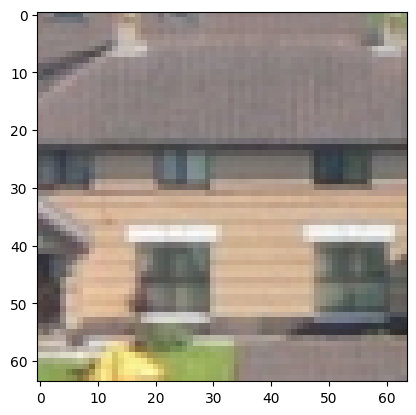

Истинный класс: Other, Предсказанный класс: Other


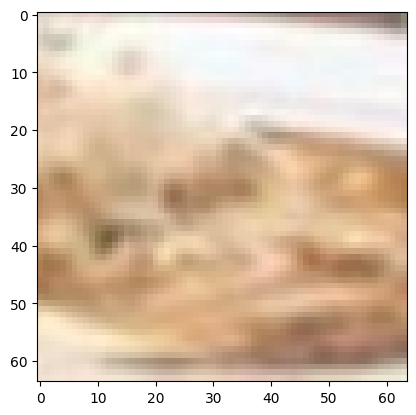

labels ---> tensor([9, 6, 9, 9])
predicted ---> tensor([9, 9, 9, 9])
total ---> 108
correct ---> 70
Истинный класс: Other, Предсказанный класс: Other


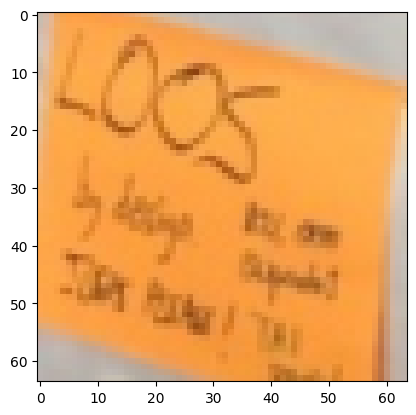

Истинный класс: House, Предсказанный класс: Other


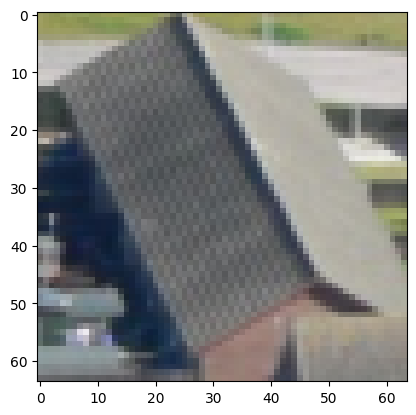

Истинный класс: Other, Предсказанный класс: Other


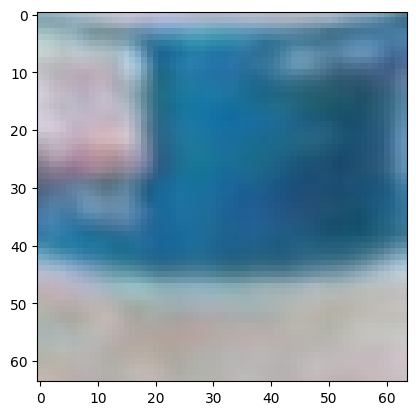

Истинный класс: Other, Предсказанный класс: Other


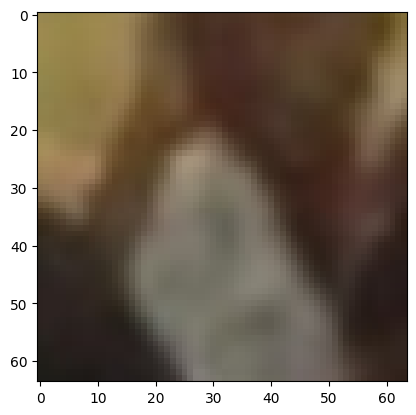

labels ---> tensor([6, 5, 0, 9])
predicted ---> tensor([9, 9, 9, 9])
total ---> 112
correct ---> 71
Истинный класс: House, Предсказанный класс: Other


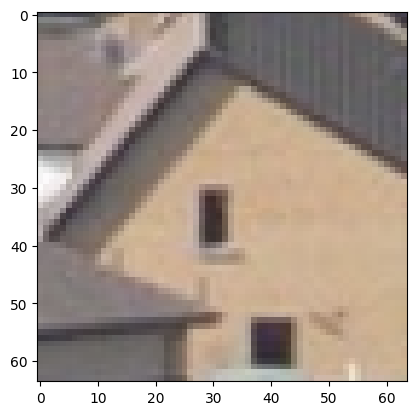

Истинный класс: Furniture, Предсказанный класс: Other


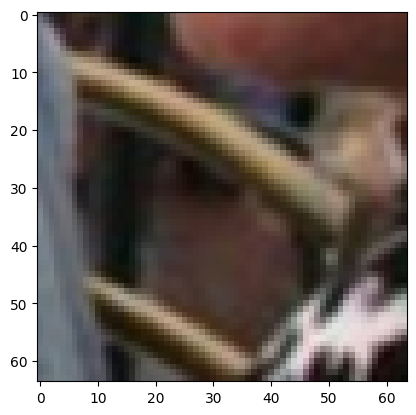

Истинный класс: Building, Предсказанный класс: Other


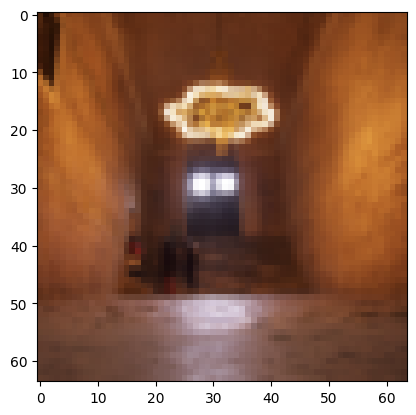

Истинный класс: Other, Предсказанный класс: Other


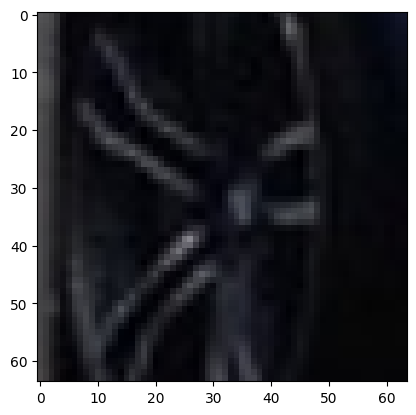

labels ---> tensor([9, 9, 9, 9])
predicted ---> tensor([9, 9, 9, 9])
total ---> 116
correct ---> 75
Истинный класс: Other, Предсказанный класс: Other


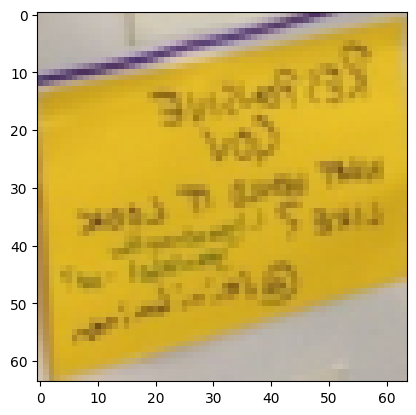

Истинный класс: Other, Предсказанный класс: Other


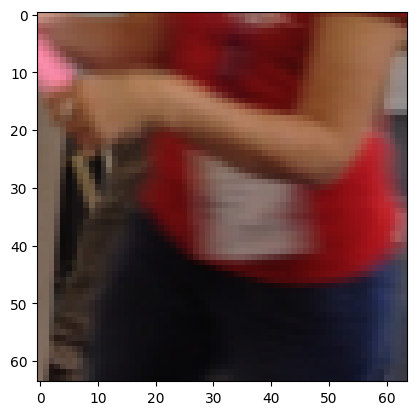

Истинный класс: Other, Предсказанный класс: Other


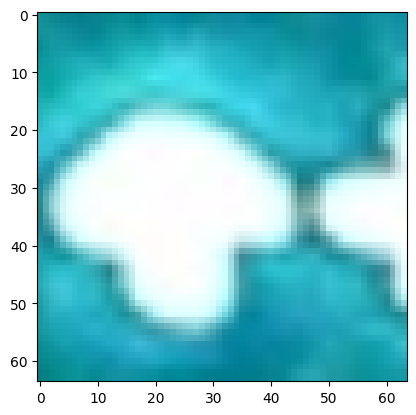

Истинный класс: Other, Предсказанный класс: Other


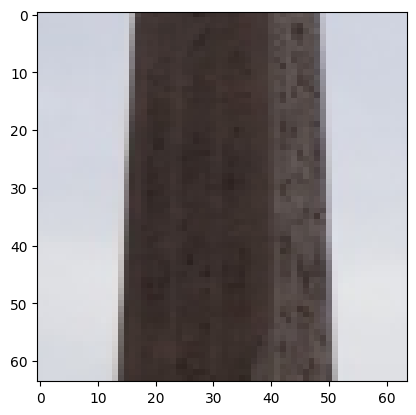

labels ---> tensor([ 9, 10, 10,  9])
predicted ---> tensor([9, 9, 9, 9])
total ---> 120
correct ---> 77
Истинный класс: Other, Предсказанный класс: Other


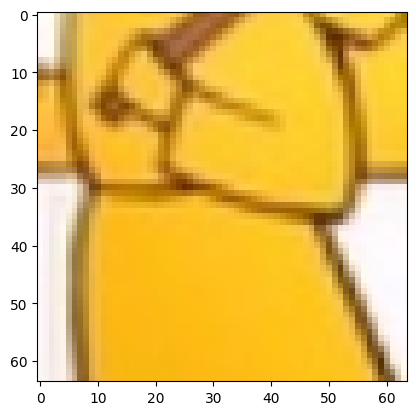

Истинный класс: Window, Предсказанный класс: Other


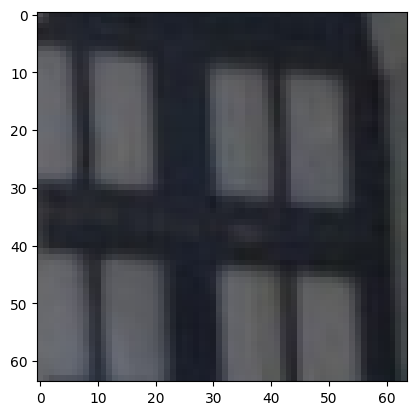

Истинный класс: Window, Предсказанный класс: Other


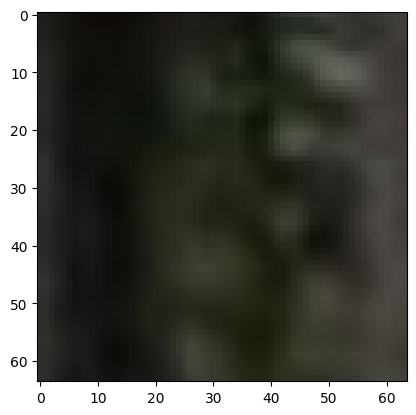

Истинный класс: Other, Предсказанный класс: Other


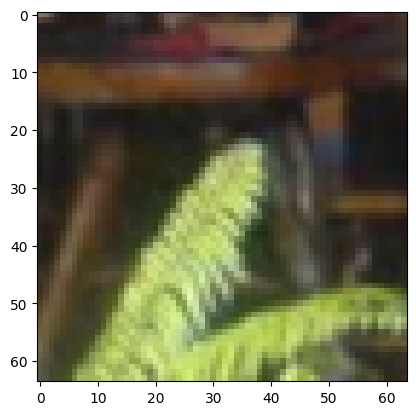

labels ---> tensor([6, 9, 5, 6])
predicted ---> tensor([6, 9, 9, 9])
total ---> 124
correct ---> 79
Истинный класс: House, Предсказанный класс: House


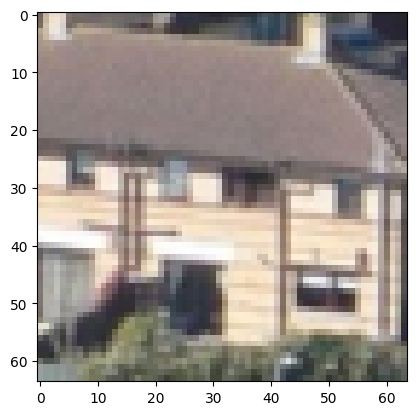

Истинный класс: Other, Предсказанный класс: Other


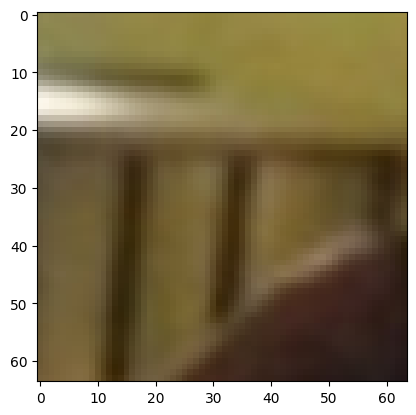

Истинный класс: Furniture, Предсказанный класс: Other


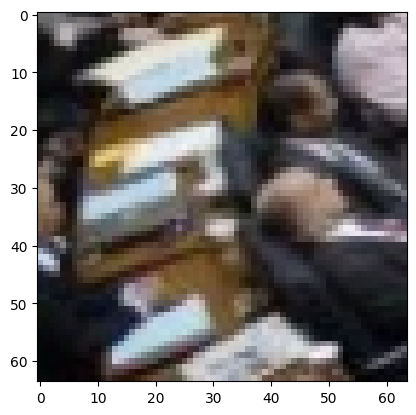

Истинный класс: House, Предсказанный класс: Other


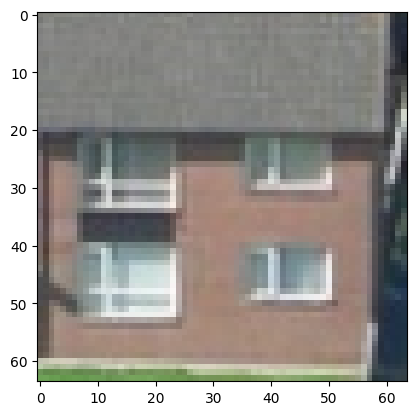

labels ---> tensor([ 9,  9,  9, 10])
predicted ---> tensor([9, 9, 9, 9])
total ---> 128
correct ---> 82
Истинный класс: Other, Предсказанный класс: Other


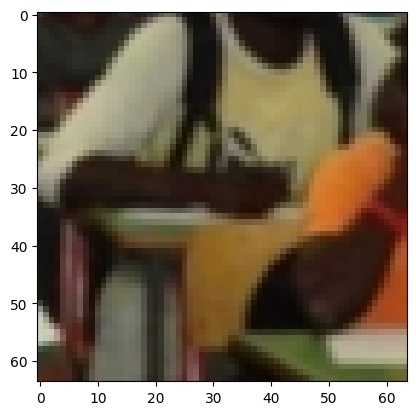

Истинный класс: Other, Предсказанный класс: Other


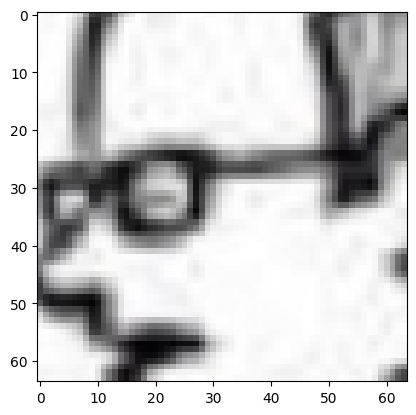

Истинный класс: Other, Предсказанный класс: Other


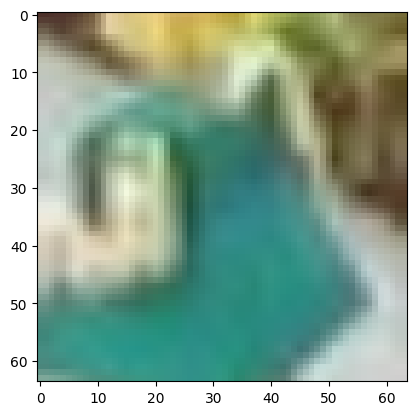

Истинный класс: Window, Предсказанный класс: Other


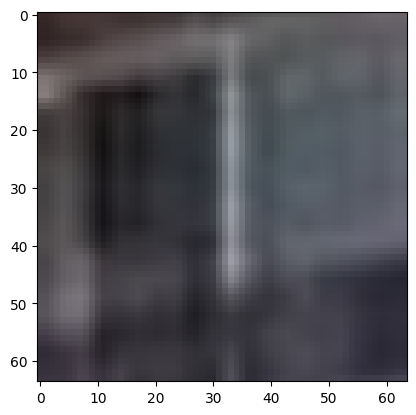

labels ---> tensor([5])
predicted ---> tensor([9])
total ---> 129
correct ---> 82
Истинный класс: Furniture, Предсказанный класс: Other


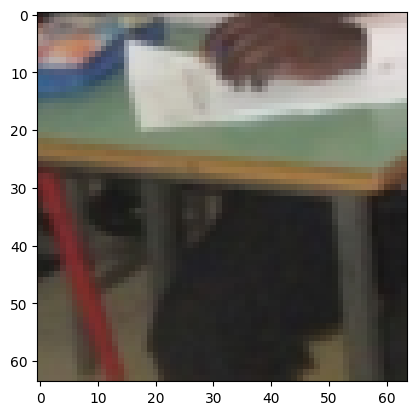

Точность на тестовых данных: 63.57%


In [10]:
# Обучение модели
num_epochs = 10

for epoch in range(num_epochs):  # количество эпох
    running_loss = 0.0
    
    print('Эпоха: ', epoch)
    
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_func(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        # print('loss ', epoch, ' -- ', running_loss)

    print('Обучение завершен  ======   ')

    print(
        'Epoch [{}/{}], Loss: {:.4f}'.format(
            epoch+1, num_epochs, loss.item()
        )
    )


# Оценка модели
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        print('labels --->', labels)
        _, predicted = torch.max(outputs.data, 1)
        print('predicted --->', predicted)
        total += labels.size(0)
        print('total --->', total)
        correct += (predicted == labels).sum().item()
        print('correct --->', correct)
        # Вывод изображений и предсказаний
        for i in range(len(images)):
            print(f'Истинный класс: {classes[labels[i]]}, Предсказанный класс: {classes[predicted[i]]}')
            imshow(images[i])

print(f'Точность на тестовых данных: {100 * correct / total:.2f}%')

# save to file
torch.save(model, 'cnn_houses-2.pt')
